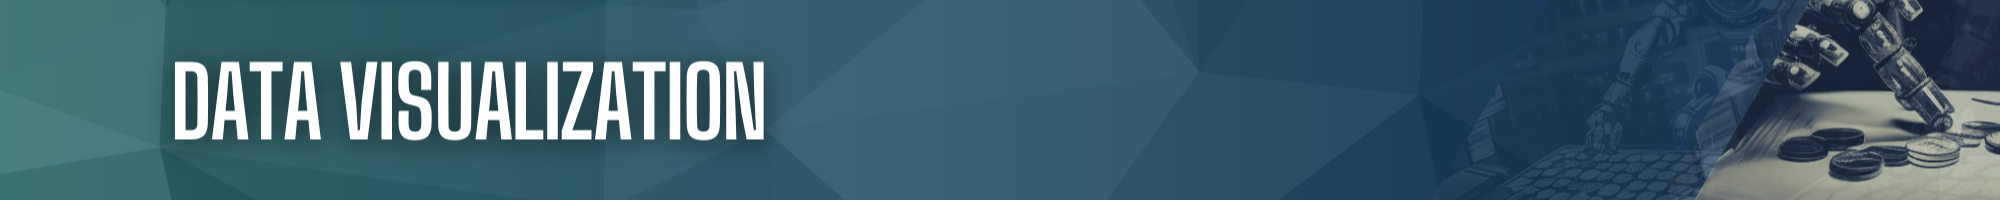

<div style="background-color: #f7f7f7; padding: 20px; border-radius: 10px; border: 2px solid #333333;">
<h2 style="font-family: Arial, sans-serif; color: #333333; text-align: center;">Gameplan</h2>
<ul style="font-family: Arial, sans-serif; color: #555555;">
<li><strong>Data Visualization:</strong> Visualize the data to uncover insights, patterns, and trends.</li>
<li><strong>Relevant Variables:</strong> Focus on key variables related to coin rarity prediction.</li>
<li><strong>Effective Techniques:</strong> Use suitable visualizations for numerical and categorical data.</li>
<li><strong>Color Coding:</strong> Employ gradients, heatmaps, or color scales to enhance understanding.</li>
<li><strong>Meaningful Comparisons:</strong> Explore relationships between variables and coin rarity.</li>
<li><strong>Aesthetics:</strong> Choose appealing design elements for visually engaging plots.</li>
</ul>
<h2 style="font-family: Arial, sans-serif; color: #333333; text-align: center;">Goal</h2>
<p style="font-family: Arial, sans-serif; color: #555555;">Leverage data visualization to gain insights into factors influencing coin rarity.</p>
</div>

In [2]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
import os

In [3]:
# Load the dataset
file_path = os.path.join(os.getcwd(), 'Data', 'df_cleaned.csv')
df_cleaned = pd.read_csv(file_path)

In [4]:
def generate_value_distribution_plot(df, column):
    counts = df[column].value_counts().reset_index()
    counts.columns = [column, 'Count']

    fig = go.Figure(data=go.Bar(
        x=counts[column],
        y=counts['Count'],
        marker=dict(
            color=counts['Count'],
            colorscale='Viridis',
            showscale=True
        )
    ))

    fig.update_layout(
        title=f"Value Distribution of {column}",
        xaxis_title=column,
        yaxis_title="Count",
        title_x=0.5,
        plot_bgcolor='rgba(0,0,0,0)',
        paper_bgcolor='rgba(0,0,0,0)',
    )

    fig.show()

In [5]:
def plot_rarity(df, column):
    # Filter out the 'unknown' values in the specified column and convert it to a numeric data type
    filtered_data = df[df[column] != 'unknown'].copy()
    filtered_data[column] = pd.to_numeric(filtered_data[column], errors='coerce')

    # Group the data by the specified column and calculate the mean Rarity
    grouped_data = filtered_data.groupby(column)['Rarity'].mean().reset_index(name='Mean Rarity')

    # Sort the values of the specified column in ascending order
    grouped_data = grouped_data.sort_values(column, ascending=True)

    # Create the line plot using Plotly
    fig = go.Figure(data=go.Scatter(
        x=grouped_data[column],
        y=grouped_data['Mean Rarity'],
        mode='lines+markers',
        marker=dict(
            size=8,
            color=grouped_data['Mean Rarity'],
            colorscale='Viridis',
            colorbar=dict(title='Mean Rarity')
        ),
        line=dict(color='darkblue', width=2),
        hovertemplate=f'{column}: %{{x}}<br>Mean Rarity: %{{y:.2f}}<extra></extra>'
    ))

    # Customize the layout
    fig.update_layout(
        title=f'Effect of {column} on Coin Rarity',
        xaxis_title=column,
        yaxis_title='Mean Rarity',
        xaxis=dict(
            type='category',
            categoryorder='array',
            categoryarray=grouped_data[column],
            tickmode='array',
            ticktext=grouped_data[column],
            tickvals=grouped_data[column],
            tickangle=45,
            showgrid=True,
            gridwidth=1,
            gridcolor='lightgray',
        ),
        yaxis=dict(
            showgrid=True,
            gridwidth=1,
            gridcolor='lightgray',
        ),
        margin=dict(l=50, r=50, t=80, b=50),
        hoverlabel=dict(bgcolor='white', font_size=12, font_family='Arial'),
    )

    fig.show()

In [6]:
def plot_rarity_by_edge_and_type(df):
    # Make a copy of the dataframe and drop rows with "unknown" values
    filtered_df = df.copy()
    filtered_df = filtered_df[(filtered_df['Edge'] != 'unknown') &
                              (filtered_df['Type'] != 'unknown') &
                              (filtered_df['Rarity'] != 'unknown')]

    # Calculate the mean Rarity by Edge
    edge_rarity = filtered_df.groupby('Edge')['Rarity'].mean().reset_index()

    # Calculate the mean Rarity by Type
    type_rarity = filtered_df.groupby('Type')['Rarity'].mean().reset_index()

    # Create the subplot layout with 1 row and 2 columns
    fig = sp.make_subplots(rows=1, cols=2, subplot_titles=('Rarity by Edge', 'Rarity by Type'))

    # Add the bar trace for Rarity by Edge
    fig.add_trace(go.Bar(
        x=edge_rarity['Edge'],
        y=edge_rarity['Rarity'],
        marker=dict(color=edge_rarity['Rarity'], coloraxis='coloraxis'),
        showlegend=False
    ), row=1, col=1)

    # Add the bar trace for Rarity by Type
    fig.add_trace(go.Bar(
        x=type_rarity['Type'],
        y=type_rarity['Rarity'],
        marker=dict(color=type_rarity['Rarity'], coloraxis='coloraxis'),
        showlegend=False
    ), row=1, col=2)

    # Set the subplot layout properties
    fig.update_layout(
        title='Rarity by Edge and Type',
        coloraxis=dict(colorscale='Viridis'),
        height=400,
        width=800
    )

    # Set the axis labels for each subplot
    fig.update_xaxes(title_text='Edge', row=1, col=1)
    fig.update_xaxes(title_text='Type', row=1, col=2)
    fig.update_yaxes(title_text='Mean Rarity', row=1, col=1)
    fig.update_yaxes(title_text='Mean Rarity', row=1, col=2)

    # Show the plot
    fig.show()

In [7]:
def plot_rarity_vs_mintage(df):
    fig = px.scatter(df, x='Mintage', y='Rarity', color='Rarity', color_continuous_scale='Viridis',
                     title='Rarity vs. Mintage', labels={'Mintage': 'Mintage', 'Rarity': 'Rarity'})
    fig.show()


In [8]:
def plot_rarity_heatmap(df):
    # Make a copy of the dataframe and drop rows with "unknown" values in the Composition and Century columns
    filtered_df = df.copy()
    filtered_df = filtered_df[(filtered_df['Composition'] != 'unknown') & (filtered_df['Century'] != 'unknown')]

    # Convert the Century column to numeric data type
    filtered_df['Century'] = pd.to_numeric(filtered_df['Century'])

    # Calculate the mean Rarity by Composition and Century
    century_composition_rarity = filtered_df.groupby(['Century', 'Composition'])['Rarity'].mean().unstack()

    # Replace NaN values with 0 and transpose the DataFrame
    century_composition_rarity = century_composition_rarity.fillna(0).transpose()

    # Create the heatmap plot using Plotly
    fig = px.imshow(century_composition_rarity, color_continuous_scale='Viridis',
                    title='Rarity by Composition and Century',
                    labels=dict(x='Century', y='Composition', color='Mean Rarity'))
    fig.update_xaxes(side='top')
    fig.show()


In [9]:
def plot_rarity_heatmap_edge_type(df):
    # Make a copy of the dataframe and drop rows with "unknown" values in the Edge and Type columns
    filtered_df = df.copy()
    filtered_df = filtered_df[(filtered_df['Edge'] != 'unknown') & (filtered_df['Type'] != 'unknown')]

    # Calculate the mean Rarity by Edge and Type
    edge_type_rarity = filtered_df.groupby(['Edge', 'Type'])['Rarity'].mean().unstack()

    # Replace NaN values with 0 and transpose the DataFrame
    edge_type_rarity = edge_type_rarity.fillna(0).transpose()

    # Create the heatmap plot using Plotly
    fig = px.imshow(edge_type_rarity, color_continuous_scale='Viridis',
                    title='Rarity by Edge and Type',
                    labels=dict(x='Edge', y='Type', color='Mean Rarity'))
    fig.update_xaxes(side='top')
    fig.show()


In [10]:
def plot_rarity_mintage_century(df):
    # Make a copy of the dataframe and drop rows with "unknown" values
    filtered_df = df.copy()
    filtered_df = filtered_df[(filtered_df['Century'] != 'unknown') &
                              (filtered_df['Mintage'] != 'unknown') &
                              (filtered_df['Rarity'] != 'unknown')]

    # Convert necessary columns to appropriate data types
    filtered_df['Century'] = pd.to_numeric(filtered_df['Century'])
    filtered_df['Mintage'] = pd.to_numeric(filtered_df['Mintage'])
    filtered_df['Rarity'] = pd.to_numeric(filtered_df['Rarity'])

    # Create the 3D scatter plot
    fig = go.Figure(data=go.Scatter3d(
        x=filtered_df['Mintage'],
        y=filtered_df['Century'],
        z=filtered_df['Rarity'],
        mode='markers',
        marker=dict(
            size=5,
            color=filtered_df['Rarity'],
            colorscale='Viridis',
            opacity=0.8
        )
    ))

    fig.update_layout(
        scene=dict(
            xaxis=dict(title='Mintage'),
            yaxis=dict(title='Century'),
            zaxis=dict(title='Rarity')
        ),
        title='Rarity, Mintage, and Century Relationship',
        width=800,
        height=600
    )

    fig.show(renderer="notebook")


In [11]:
generate_value_distribution_plot(df_cleaned, 'Rarity')

In [12]:
plot_rarity(df_cleaned, 'Century')

In [13]:
plot_rarity_vs_mintage(df_cleaned)

In [14]:
plot_rarity_by_edge_and_type(df_cleaned)

In [15]:
plot_rarity_heatmap(df_cleaned)

In [16]:
plot_rarity_heatmap_edge_type(df_cleaned)

In [17]:
plot_rarity_mintage_century(df_cleaned)

In [18]:
# For backup
folder_path = os.path.join(os.getcwd(), 'Data',)
file_path = os.path.join(folder_path, 'df_cleaned.csv')
df_cleaned.to_csv(file_path, index=False)